In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls


__init__.py  example.ipynb  power.ipynb  time_series.ipynb


In [6]:
df = pd.read_parquet('../../dataset/LD2011_2014.parquet')
df = df.rename(columns={'Unnamed: 0': 'datetime'})

In [7]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [8]:
df.head()


,datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(140256, 371)

In [10]:
df['datetime'] = pd.to_datetime(df.pop('datetime'), format='%Y-%m-%d %H:%M:%S')

In [11]:

def plot_series(df, col):
    plot_features = df[col]
    plot_features.index = df['datetime']
    _ = plot_features.plot(subplots=True)

    plot_features = df[col][50000:51480]
    plot_features.index = df['datetime'][50000:51480]
    _ = plot_features.plot(subplots=True)


In [14]:
import sys
sys.path.append('/app/src/')

In [15]:
from preprocessing.power_preprocessing import PowerPreprocessor

In [33]:
pp = PowerPreprocessor()
pp.preprocess()

In [34]:
pp.train_df.head()

,total,weekday,month,year
datetime,,,,
2011-01-01 00:15:00,-1.373064,5,1,0.0
2011-01-01 00:30:00,-1.365173,5,1,0.0
2011-01-01 00:45:00,-1.362991,5,1,0.0
2011-01-01 01:00:00,-1.374987,5,1,0.0
2011-01-01 01:15:00,-1.400813,5,1,0.0


In [46]:
pp.train_df['weekday'].describe()

count    98112.00000
mean         3.00000
std          2.00001
min          0.00000
25%          1.00000
50%          3.00000
75%          5.00000
max          6.00000
Name: weekday, dtype: float64

In [20]:
type(pp.train_df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

In [36]:
without_date = df.drop(columns=['datetime'])
df['total'] = without_date.sum(axis=1)
total_df = df[['datetime', 'total']]
total_df.head()

,datetime,total
0,2011-01-01 00:15:00,68513.115338
1,2011-01-01 00:30:00,69180.304361
2,2011-01-01 00:45:00,69364.850573
3,2011-01-01 01:00:00,68350.480660
4,2011-01-01 01:15:00,66166.874303


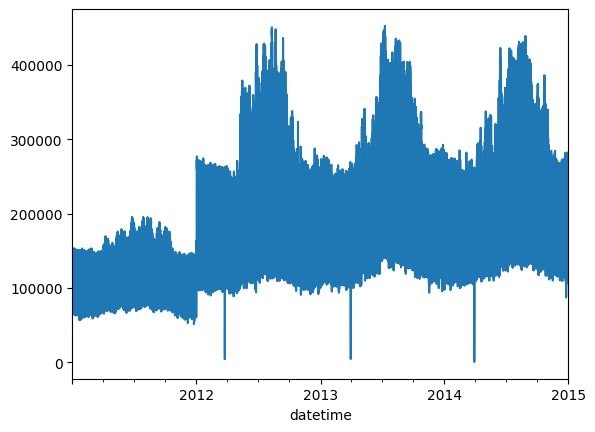

In [37]:
plot_series(total_df, 'total')

In [38]:
from training.window_generator import WindowGenerator

In [39]:
window = WindowGenerator(input_width=96,
                         label_width=96,
                        shift=96,
                        label_columns=['total'],
                        train_df=pp.train_df,
                        val_df=pp.val_df,
                        test_df=pp.test_df)


In [44]:
window.train.map(lambda x, y: ({'time_series': x[:,:,0:1], 'weekday': x[:, -1, 1], 'month': x[:, -1, 2], 'year': x[:, -1, 3]}, y))

Cause: could not parse the source code of <function WindowGenerator.make_dataset.<locals>.<lambda> at 0x7fda0db29790>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function WindowGenerator.make_dataset.<locals>.<lambda> at 0x7fda0db29790>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


TypeError: <lambda>() missing 1 required positional argument: 'y'

In [14]:
from training.configs.train_config import TrainConfig
from training.configs.model_config import ModelConfig, ModelType

In [22]:
model = ModelType.rnn.model()
model.build_model(lstm_units=64)
history = model.compile_and_fit(window, epochs=1)
print(history)

3066/3066 [==============================] - 42s 13ms/step - loss: 0.0130 - mean_absolute_error: 0.0602 - val_loss: 0.0067 - val_mean_absolute_error: 0.0550


In [16]:
import tensorflow as tf

In [17]:
val_score = model.model.evaluate(window.val)
test_score = model.model.evaluate(window.test, verbose=0)
print("Validation", val_score, "Test", test_score)

874/874 [==============================] - 6s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.1195
Validation [0.036246158182621, 0.11950026452541351] Test [0.043582577258348465, 0.13196969032287598]


In [23]:
model = ModelType.baseline.model(label_index=window.column_indices['total'])
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [24]:
val_score = model.evaluate(window.val)
test_score = model.evaluate(window.test, verbose=0)
print("Validation", val_score, "Test", test_score)

874/874 [==============================] - 5s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0700
Validation [0.01063784584403038, 0.0700196698307991] Test [0.013380005024373531, 0.07152271270751953]
